In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
import requests
import mysql.connector
import config
from bs4 import BeautifulSoup 
import json
from functools import reduce
from pandas import DataFrame

pd.set_option('display.max_columns', 310)


# Data import/Manipulation from CSV file

In [62]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", usecols=['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'User_Score','User_Count','Developer','Rating'])
# 
# dropping all null values
data.dropna(inplace = True)
data.info()
# data_le_nums


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 180 to 16141
Data columns (total 15 columns):
Name               6644 non-null object
Platform           6644 non-null object
Year_of_Release    6644 non-null float64
Genre              6644 non-null object
Publisher          6644 non-null object
NA_Sales           6644 non-null float64
EU_Sales           6644 non-null float64
JP_Sales           6644 non-null float64
Other_Sales        6644 non-null float64
Global_Sales       6644 non-null float64
Critic_Score       6644 non-null float64
User_Score         6644 non-null object
User_Count         6644 non-null float64
Developer          6644 non-null object
Rating             6644 non-null object
dtypes: float64(8), object(7)
memory usage: 830.5+ KB


In [362]:
# copy dataframe to new DF, and converting FLOAT's to INT's
data_le = data.copy()
# makes Year_of_Release into INT it was a FLOAT
data_le['Year_of_Release']=data_le['Year_of_Release'].astype(int)
data_le['Critic_Score']=data_le['Critic_Score'].astype(int)
data_le['User_Count']=data_le['User_Count'].astype(float)
data_le['User_Score']=data_le['User_Score'].astype(float) * 10
data_le['NA_Sales']=1000000 * data_le['NA_Sales'].astype(float)
data_le['EU_Sales']=data_le['EU_Sales'].astype(float) * 1000000
data_le['JP_Sales']=data_le['JP_Sales'].astype(float) * 1000000
data_le['Other_Sales']=data_le['Other_Sales'].astype(float) * 1000000
data_le['Global_Sales']=data_le['Global_Sales'].astype(float) * 1000000

data_le_nums = data_le.drop(columns=['Name','Platform','Genre','Publisher', 'Developer', 'Rating'])

data_original=data_le.copy()


In [338]:
data_le = data_le.sort_values(by=['Name'])

# Merging all console types per game into one row

In [339]:
df = data_le.groupby(['Name']).agg({'Platform': ','.join},{'Genre': ','.join},{'Developer': ','.join})
df
# data_name = data_le.groupby('Name')['Platform'].apply(',' .join).reset_index()


Platform
Name                                                  
.hack//Infection Part 1                            PS2
.hack//Mutation Part 2                             PS2
.hack//Outbreak Part 3                             PS2
007 Racing                                          PS
007: Quantum of Solace                 Wii,X360,PS3,PC
007: The World is not Enough                        PS
1 vs. 100                                           DS
1701 A.D.                                           PC
18 Wheeler: American Pro Trucker                GC,PS2
18 Wheels of Steel: Extreme Trucker                 PC
187: Ride or Die                                XB,PS2
2002 FIFA World Cup                          GC,XB,PS2
2010 FIFA World Cup South Africa      PS3,PSP,X360,Wii
2014 FIFA World Cup Brazil                    PS3,X360
24: The Game                                       PS2
25 to Life                                      PS2,XB
300: March to Glory                                PSP
3D Dot Game Heroes                                 PS3
4x4 EVO 2                                           XB
50 Cent: Blood on the Sand                    PS3,X360
50 Cent: Bulletproof                            XB,PS2
7 Wonders of the Ancient World                      DS
7th Dragon III Code: VFD                           3DS
A Boy and His Blob                                 Wii
A Vampyre Story                                     PC
A Witch's Tale                                      DS
AC/DC LIVE: Rock Band Track Pack              PS3,X360
AMF Bowling 2004                                    XB
AMF Xtreme Bowling                                 PS2
APB Reloaded                                        PC
...                                                ...
Zero Escape: Virtue's Last Reward                  3DS
Zoids Assault                                     X360
ZombiU                                            WiiU
Zone of the Enders                                 PS2
Zone of the Enders HD Collection              PS3,X360
Zone of the Enders: The 2nd Runner                 PS2
Zone of the Enders: The Fist of Mars               GBA
Zoo Keeper                                          DS
Zoo Tycoon 2                                        PC
Zoo Tycoon 2 DS                                     DS
Zoo Tycoon DS                                       DS
ZooCube                                             GC
Zubo                                                DS
Zumba Fitness                                     X360
Zumba Fitness Core                                X360
Zumba Fitness Rush                                X360
Zumba Fitness: World Party                        XOne
[Prototype 2]                              PS3,X360,PC
[Prototype]                                   X360,PS3
de Blob                                            Wii
de Blob 2                              DS,Wii,X360,PS3
echochrome                                         PSP
htoL#NiQ: The Firefly Diary                        PSV
inFAMOUS                                           PS3
inFAMOUS 2                                         PS3
inFAMOUS: Second Son                               PS4
nail'd                                        PS3,X360
pro evolution soccer 2011             X360,Wii,PSP,PS3
uDraw Studio: Instant Artist                      X360
wwe Smackdown vs. Raw 2006                         PS2

[4278 rows x 1 columns]

In [340]:
data_le = data_le.merge(df, how='inner', left_on='Name', right_on='Name')

In [341]:
data_le = data_le.drop_duplicates(subset='Name', keep='first', inplace=False)


In [342]:
data_le['Platform']=data_le['Platform_y']

In [343]:
data_le = data_le.drop(columns=['Platform_x','Platform_y'])

In [344]:
data_le

Name  Year_of_Release         Genre  \
0                  .hack//Infection Part 1             2002  Role-Playing   
1                   .hack//Mutation Part 2             2002  Role-Playing   
2                   .hack//Outbreak Part 3             2002  Role-Playing   
3                               007 Racing             2000        Racing   
4                   007: Quantum of Solace             2008        Action   
8             007: The World is not Enough             2000        Action   
9                                1 vs. 100             2008          Misc   
10                               1701 A.D.             2006    Simulation   
11        18 Wheeler: American Pro Trucker             2002        Racing   
13     18 Wheels of Steel: Extreme Trucker             2009        Racing   
14                        187: Ride or Die             2005        Racing   
16                     2002 FIFA World Cup             2002        Sports   
19        2010 FIFA World Cup South Africa             2010        Sports   
23              2014 FIFA World Cup Brazil             2014        Sports   
25                            24: The Game             2006     Adventure   
26                              25 to Life             2006       Shooter   
28                     300: March to Glory             2007        Action   
29                      3D Dot Game Heroes             2009  Role-Playing   
30                               4x4 EVO 2             2001        Racing   
31              50 Cent: Blood on the Sand             2009       Shooter   
33                    50 Cent: Bulletproof             2005        Action   
35          7 Wonders of the Ancient World             2007        Puzzle   
36                7th Dragon III Code: VFD             2015  Role-Playing   
37                      A Boy and His Blob             2009      Platform   
38                         A Vampyre Story             2008     Adventure   
39                          A Witch's Tale             2009  Role-Playing   
40        AC/DC LIVE: Rock Band Track Pack             2008          Misc   
42                        AMF Bowling 2004             2003        Sports   
43                      AMF Xtreme Bowling             2006        Sports   
44                            APB Reloaded             2011  Role-Playing   
...                                    ...              ...           ...   
6603     Zero Escape: Virtue's Last Reward             2012     Adventure   
6604                         Zoids Assault             2007      Strategy   
6605                                ZombiU             2012        Action   
6606                    Zone of the Enders             2001       Shooter   
6607      Zone of the Enders HD Collection             2012    Simulation   
6609    Zone of the Enders: The 2nd Runner             2003    Simulation   
6610  Zone of the Enders: The Fist of Mars             2001  Role-Playing   
6611                            Zoo Keeper             2004        Puzzle   
6612                          Zoo Tycoon 2             2004      Strategy   
6613                       Zoo Tycoon 2 DS             2008      Strategy   
6614                         Zoo Tycoon DS             2005      Strategy   
6615                               ZooCube             2002        Puzzle   
6616                                  Zubo             2008          Misc   
6617                         Zumba Fitness             2010        Sports   
6618                    Zumba Fitness Core             2012          Misc   
6619                    Zumba Fitness Rush             2012        Sports   
6620            Zumba Fitness: World Party             2013          Misc   
6621                         [Prototype 2]             2012        Action   
6624                           [Prototype]             2009        Action   
6626                               de Blob             2008      Platform   
6627                             d

In [345]:
data_le.to_csv('/Users/SDMAN/Documents/Flatiron/Projects/Flatiron-Project-4-/data_le.csv', index = None, header=True)
# data_name2.to_csv('/Users/SDMAN/Documents/Flatiron/Projects/Flatiron-Project-4-/data_name.csv', index = None, header=True)
# data_le.to_csv('data_le.csv', encoding='utf-8')


### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [346]:
# Created dummies for rating column

data_le_platform_dummy = data_le['Platform'].str.get_dummies(sep=',')
data_le_genre_dummy = data_le['Genre'].str.get_dummies(sep=',')
data_le_rating_dummy = data_le['Rating'].str.get_dummies(sep=',')
data_le_publisher_dummy = data_le['Publisher'].str.get_dummies(sep=',')


#merging all dummy dataframes to main dataframe

dataframes=[data_le,data_le_rating_dummy, data_le_platform_dummy,data_le_genre_dummy,data_le_publisher_dummy]

data_le_dummy =  reduce(lambda left,right: pd.merge(left, right, how='outer', left_index=True, right_index=True),  dataframes)
data_le_dummy = data_le_dummy.fillna(0)

In [347]:
data_le_dummy.Publisher.describe()

count                4278
unique                247
top       Electronic Arts
freq                  386
Name: Publisher, dtype: object

In [348]:
# data_le_dummy = data_le_dummy.reset_index()
data_le_dummy.reset_index()

index                                  Name  Year_of_Release  \
0         0               .hack//Infection Part 1             2002   
1         1                .hack//Mutation Part 2             2002   
2         2                .hack//Outbreak Part 3             2002   
3         3                            007 Racing             2000   
4         4                007: Quantum of Solace             2008   
5         8          007: The World is not Enough             2000   
6         9                             1 vs. 100             2008   
7        10                             1701 A.D.             2006   
8        11      18 Wheeler: American Pro Trucker             2002   
9        13   18 Wheels of Steel: Extreme Trucker             2009   
10       14                      187: Ride or Die             2005   
11       16                   2002 FIFA World Cup             2002   
12       19      2010 FIFA World Cup South Africa             2010   
13       23            2014 FIFA World Cup Brazil             2014   
14       25                          24: The Game             2006   
15       26                            25 to Life             2006   
16       28                   300: March to Glory             2007   
17       29                    3D Dot Game Heroes             2009   
18       30                             4x4 EVO 2             2001   
19       31            50 Cent: Blood on the Sand             2009   
20       33                  50 Cent: Bulletproof             2005   
21       35        7 Wonders of the Ancient World             2007   
22       36              7th Dragon III Code: VFD             2015   
23       37                    A Boy and His Blob             2009   
24       38                       A Vampyre Story             2008   
25       39                        A Witch's Tale             2009   
26       40      AC/DC LIVE: Rock Band Track Pack             2008   
27       42                      AMF Bowling 2004             2003   
28       43                    AMF Xtreme Bowling             2006   
29       44                          APB Reloaded             2011   
...     ...                                   ...              ...   
4248   6603     Zero Escape: Virtue's Last Reward             2012   
4249   6604                         Zoids Assault             2007   
4250   6605                                ZombiU             2012   
4251   6606                    Zone of the Enders             2001   
4252   6607      Zone of the Enders HD Collection             2012   
4253   6609    Zone of the Enders: The 2nd Runner             2003   
4254   6610  Zone of the Enders: The Fist of Mars             2001   
4255   6611                            Zoo Keeper             2004   
4256   6612                          Zoo Tycoon 2             2004   
4257   6613                       Zoo Tycoon 2 DS             2008   
4258   6614                         Zoo Tycoon DS             2005   
4259   6615                               ZooCube             2002   
4260   6616                                  Zubo             2008   
4261   6617                         Zumba Fitness             2010   
4262   6618                    Zumba Fitness Core             2012   
4263   6619                    Zumba Fitness Rush             2012   
4264   6620            Zumba Fitness: World Party             2013   
4265   6621                         [Prototype 2]             2012   
4266   6624                           [Prototype]             2009   
4267   6626                               de Blob             2008   
4268   6627                             de Blob 2             2011   
4269   6631                            echochrome             2008   
4270   6632           htoL#NiQ: The Firefly Diary             2014   
4271   6633                              inFAMOUS             2009   
4272   6634                            inFAMOUS 2             2011   
4273   6635     

In [349]:
# dropping columns for extra dummy variable and orginal column

# data_le_with_dummies.drop(columns='index_x')
data_le_dummy = data_le_dummy.drop(columns=['Platform_x','Genre','Publisher','Developer','Rating','GBA', 'Platform_y','Puzzle','5pb'])




In [351]:
data_le_dummy.to_csv('/Users/SDMAN/Documents/Flatiron/Projects/Flatiron-Project-4-/data_le_dummy.csv', index = None, header=True)


In [389]:
# separate global sales by more than 5 million or less into 2 groups
data_original['Highly_Sold']= data_original['Global_Sales']  >= 10000000
data_original['Highly_Sold']=  5000000 > data_original['Global_Sales']  < 10000000

data_original['Slightly_Sold']= data_original['Global_Sales']  <= 5000000

In [390]:
glob_high_plat = data_original.groupby(['Platform','Highly_Sold']).Platform.count().unstack()
print(data_le.groupby(['Highly_Sold','Platform']).Global_Sales.count().unstack())

Platform       3DS    DC     DS    GBA     GC     PC     PS     PS2    PS3  \
Highly_Sold                                                                  
False        144.0  14.0  452.0  234.0  346.0  616.0  137.0  1124.0  746.0   
True           6.0   NaN   14.0    3.0    2.0    3.0   13.0    17.0   26.0   

Platform       PS4    PSP    PSV    Wii  WiiU   X360     XB   XOne  
Highly_Sold                                                         
False        149.0  387.0  108.0  460.0  81.0  833.0  564.0  104.0  
True           6.0    3.0    NaN   19.0   2.0   27.0    2.0    2.0  


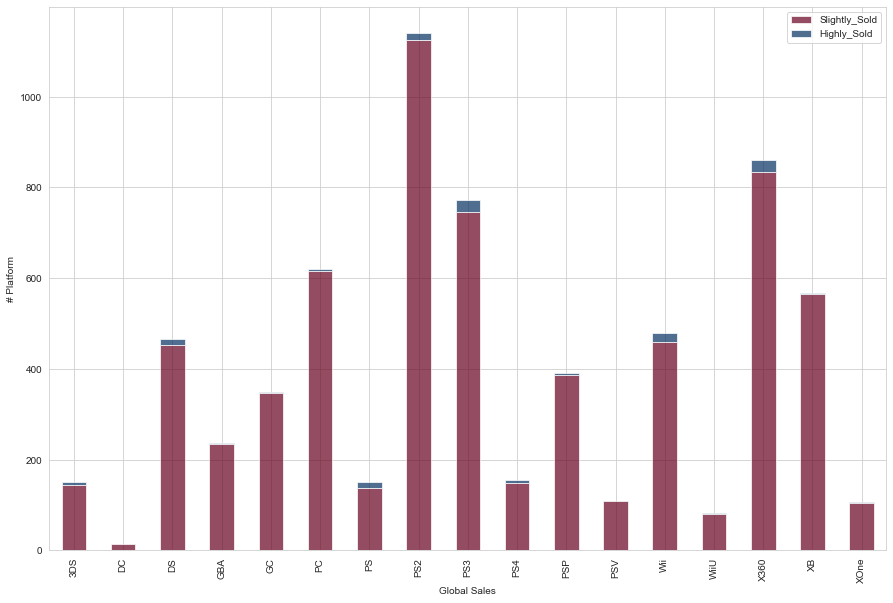

In [391]:

p2 = glob_high_plat.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='RdBu',figsize=(15,10))
p2.set_title('')
p2.set_xlabel('Global Sales')
p2.set_ylabel('# Platform')
p2.legend(['Slightly_Sold', 'Highly_Sold'])
plt.show()

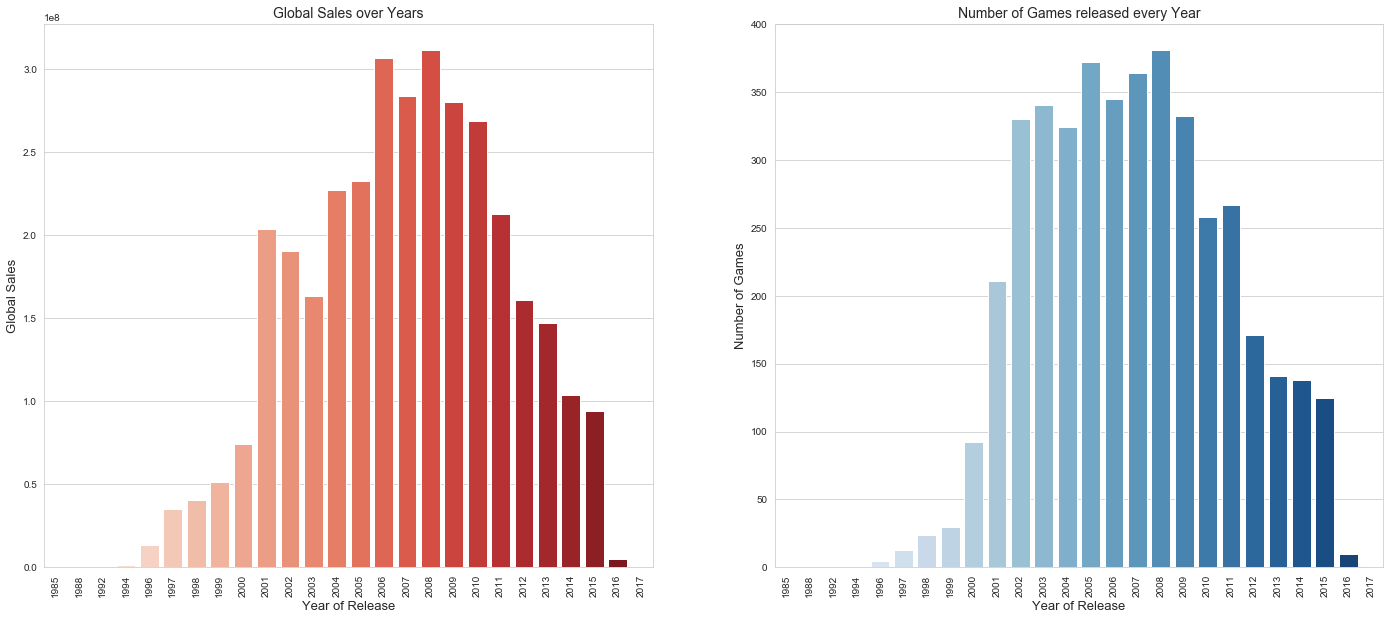

In [335]:
fig=plt.figure(figsize=(24,10))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.title('Global Sales over Years',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year_of_Release',y='Global_Sales',data=data_le.groupby(data_le['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index(),palette='Reds')
plt.ylabel('Global Sales',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13})

plt.subplot(1, 2, 2)
plt.title('Number of Games released every Year',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x=data_le.Year_of_Release.value_counts().index, y=data_le.Year_of_Release.value_counts(),palette='Blues');
plt.ylabel('Number of Games',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13});

In [336]:
data_le.describe(include = 'O').transpose()


count unique                                        top  freq
Name       4278   4278  Final Fantasy IV: The Complete Collection     1
Genre      4278     12                                     Action   839
Publisher  4278    247                            Electronic Arts   386
Developer  4278   1185                                     Capcom    95
Rating     4278      5                                          T  1564
Platform   4278    417                                        PS2   597

# Api Calls for the Console info

In [58]:
api_key = config.api_key

headers = {
    'x-rapidapi-host': "rawg-video-games-database.p.rapidapi.com",
    'x-rapidapi-key': f"{api_key}"
    }
console_data = []
for i in range(1,100):    ### Consoles in api call some are empty and i know there isn't more then 100 consoles
    url = f"https://rawg-video-games-database.p.rapidapi.com/platforms/{i}"
    response = requests.request("GET", url, headers=headers)
    if response == '{"detail":"Not found."}':
        break
    else:
        console_data.append(response.json())

console_data

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [704]:
#making copy of api info
console_data_copy = console_data.copy()
console_data_copy

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [59]:
# removing empty "{"detail":"Not found."}" from api call list of dictionaries
console_data_copy = [x for x in console_data_copy if keys is not 'detail' in x]

console_data_copy

NameError: name 'keys' is not defined

In [678]:
# for i in range(0,len(console_data_copy)):
#     if console_data_copy[i] == {'detail': 'Not found.'}:
#         console_data_copy.remove(console_data_copy[i])
#         continue
#     else:
#         break
# console_data_copy



[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [672]:
# for i in range(0,len(console_data_copy)):
#     data_consoles = pd.DataFrame.from_dict(console_data_copy[i])

# data_consoles

ValueError: If using all scalar values, you must pass an index

In [742]:
data_consoles = pd.DataFrame.from_dict(console_data_copy)
data_consoles.drop(columns = ['year_end' ,'year_start', 'detail', 'image'])


description  games_count    id  \
0   <p>Xbox One is a home video game console relea...       2942.0   1.0   
1                                                 NaN          NaN   NaN   
2   <p>iOS is an operating system initially develo...      64520.0   3.0   
3   <p>PC games, or personal computer games, start...     194331.0   4.0   
4   <p>MacOS (previously OS X) is an operating sys...      45674.0   5.0   
5   <p>Linux is a free and open-source software op...      30416.0   6.0   
6   <p>Nintendo Switch is a hybrid video game cons...       3025.0   7.0   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...       1706.0   8.0   
8   <p>Nintendo DS is Nintendo’s fourth major port...       2239.0   9.0   
9   <p>Nintendo Wii U is the sixth major home vide...       1271.0  10.0   
10  <p>Wii is Nintendo’s fifth major home video ga...       2291.0  11.0   
11  <p>NEOGEO is a cartridge-based arcade system b...         37.0  12.0   
12                                                            16.0  13.0   
13  <p>Xbox 360 is a home video game console relea...       2477.0  14.0   
14  <p>PlayStation 2 is the sixth generation video...       1708.0  15.0   
15  <p>PS3 is a home gaming console released by So...       3545.0  16.0   
16  <p>PSP, or PlayStation Portable, is the first ...       1524.0  17.0   
17  <p>PlayStation 4 is a home video game console ...       4313.0  18.0   
18  <p>PS Vita is a handheld video game console re...       1872.0  19.0   
19                                                NaN          NaN   NaN   
20  <p>Android is a mobile operating system based ...      26868.0  21.0   
21  <p>Atari Flashback is a series of dedicated vi...         29.0  22.0   
22  <p>Atari 2600 (initially released an Atari Vid...        275.0  23.0   
23  <p>Game Boy Advance is Nintendo’s third major ...        875.0  24.0   
24  <p>Atari 8-bit family is a series of home comp...        297.0  25.0   
25  <p>Game Boy is the first major portable video ...        564.0  26.0   
26  <p>PlayStation is a home video game console re...       1455.0  27.0   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         53.0  28.0   
28                                                NaN          NaN   NaN   
29                                                NaN          NaN   NaN   
..                                                ...          ...   ...   
69                                                NaN          NaN   NaN   
70                                                NaN          NaN   NaN   
71                                                NaN          NaN   NaN   
72                                                NaN          NaN   NaN   
73  <p>SEGA Master System (also known as Mark III ...        194.0  74.0   
74                                                NaN          NaN   NaN   
75                                                NaN          NaN   NaN   
76  <p>Game Gear is the first portable video game ...        149.0  77.0   
77                                                NaN          NaN   NaN   
78  <p>Super Nintendo Entertainment System or SNES...        761.0  79.0   
79  <p>Xbox is a home video game console released ...        617.0  80.0   
80                                                NaN          NaN   NaN   
81                                                NaN          NaN   NaN   
82  <p>Nintendo 64 is the third major video game h...        347.0  83.0   
83                                                NaN          NaN   NaN   
84                                                NaN          NaN   NaN   
85                                                NaN          NaN   NaN   
86                                                NaN          NaN   NaN   
87                                                NaN          NaN   NaN   
88                                                NaN          NaN   NaN   
89                                                NaN          NaN   NaN   
90            

In [732]:
data_consoles.dropna(how='all')

Empty DataFrame
Columns: [description, detail, games_count, id, image, image_background, name, slug, year_end, year_start]
Index: []

In [748]:
data_consoles2 = data_consoles
data_consoles2.usecols=['id' ,'year_start', 'detail', 'image']

data_consoles2 = data_consoles2.dropna(how='all')


In [749]:
data_consoles2

description      detail  \
0   <p>Xbox One is a home video game console relea...         NaN   
1                                                 NaN  Not found.   
2   <p>iOS is an operating system initially develo...         NaN   
3   <p>PC games, or personal computer games, start...         NaN   
4   <p>MacOS (previously OS X) is an operating sys...         NaN   
5   <p>Linux is a free and open-source software op...         NaN   
6   <p>Nintendo Switch is a hybrid video game cons...         NaN   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...         NaN   
8   <p>Nintendo DS is Nintendo’s fourth major port...         NaN   
9   <p>Nintendo Wii U is the sixth major home vide...         NaN   
10  <p>Wii is Nintendo’s fifth major home video ga...         NaN   
11  <p>NEOGEO is a cartridge-based arcade system b...         NaN   
12                                                            NaN   
13  <p>Xbox 360 is a home video game console relea...         NaN   
14  <p>PlayStation 2 is the sixth generation video...         NaN   
15  <p>PS3 is a home gaming console released by So...         NaN   
16  <p>PSP, or PlayStation Portable, is the first ...         NaN   
17  <p>PlayStation 4 is a home video game console ...         NaN   
18  <p>PS Vita is a handheld video game console re...         NaN   
19                                                NaN  Not found.   
20  <p>Android is a mobile operating system based ...         NaN   
21  <p>Atari Flashback is a series of dedicated vi...         NaN   
22  <p>Atari 2600 (initially released an Atari Vid...         NaN   
23  <p>Game Boy Advance is Nintendo’s third major ...         NaN   
24  <p>Atari 8-bit family is a series of home comp...         NaN   
25  <p>Game Boy is the first major portable video ...         NaN   
26  <p>PlayStation is a home video game console re...         NaN   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         NaN   
28                                                NaN  Not found.   
29                                                NaN  Not found.   
..                                                ...         ...   
69                                                NaN  Not found.   
70                                                NaN  Not found.   
71                                                NaN  Not found.   
72                                                NaN  Not found.   
73  <p>SEGA Master System (also known as Mark III ...         NaN   
74                                                NaN  Not found.   
75                                                NaN  Not found.   
76  <p>Game Gear is the first portable video game ...         NaN   
77                                                NaN  Not found.   
78  <p>Super Nintendo Entertainment System or SNES...         NaN   
79  <p>Xbox is a home video game console released ...         NaN   
80                                                NaN  Not found.   
81                                                NaN  Not found.   
82  <p>Nintendo 64 is the third major video game h...         NaN   
83                                                NaN  Not found.   
84                                                NaN  Not found.   
85                                                NaN  Not found.   
86                                                NaN  Not found.   
87                                                NaN  Not found.   
88                                                NaN  Not found.   
89                                                NaN  Not found.   
90                                                NaN  Not found.   
91                                                NaN  Not found.   
92                                                NaN  Not found.   
93                                                NaN  Not found.   
94                                                NaN  Not found.   
95                                      

# Web scrapping console sell 

In [245]:
# Scrapping console sales data
URL = 'http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/'
r = requests.get(URL)


# Combining both urls into one 'soup'
soup = BeautifulSoup(r.content , 'html.parser')

#printing in sytlized text to read easier
print(soup.prettify()) 


<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- VGCHARTZ MAIN HEADER TAGS -->
  <!-- Venatus Market Ad-Manager (vgchartz.com) -->
  <script>
   (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
  </script>
  <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
  <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
  <script src="http://www.google-analytics.com/urchin.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   _uac

In [385]:
list(soup.children)

['html', '\n', <html lang="en">
 <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uac

In [386]:
[type(item) for item in list(soup.children)]


[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [388]:
html = list(soup.children)[2]
html

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/javascript">
        _uacct = "UA-2243248-1";
     

In [390]:
list(html.children)


['\n', <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uacct = "UA-2243248-1";
     

In [389]:
# 
console_sales_table = soup.find_all(class_='chart')
console_sales_table


[<table cellpadding="0" cellspacing="0" class="chart" id="myTable" width="100%">
 <thead>
 <tr>
 <th>Pos</th>
 <th style="text-align:left;">Platform</th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/NA/">North America</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/EU/">Europe</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/JP/">Japan</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/ROW/">Rest of World</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/" id="selected">Global</a></center></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td><a href="http://www.vgchartz.com/gamedb/games.php?console=PS2">PlayStation 2 (PS2)</a></td>
 <td><center>53.65</center></td>
 <td><center>55.28</center></td>
 <td><center>23.18</center></td>
 <td><center>25.57</cent

In [400]:
table_header=soup.find_all('th').get_text()

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [399]:
table_data=soup.find_all('td')
table_data

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [14]:
data

Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013.0   
17                    Grand Theft Auto: San Andreas      PS2           2004.0   
19     Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
23                               Grand Theft Auto V     X360           2013.0   
24                      Grand Theft Auto: Vice City      PS2           2002.0   
26      Brain Age 2: More Training in Minutes a Day       DS           2005.0   
28                           Gran Turismo 3: A-Spec      PS2           2001.0   
29                   Call of Duty: Modern Warfare 3     X360           2011.0   
32                          Call of Duty: Black Ops     X360           2010.0   
34                       Call of Duty: Black Ops II      PS3           2012.0   
35                       Call of Duty: Black Ops II     X360           2012.0   
36                   Call of Duty: Modern Warfare 2     X360           2009.0   
37                   Call of Duty: Modern Warfare 3      PS3           2011.0   
38                             Grand Theft Auto III      PS2           2001.0   
39                          Super Smash Bros. Brawl      Wii           2008.0   
40                                     Mario Kart 7      3DS           2011.0   
41                          Call of Duty: Black Ops      PS3           2010.0   
42                               Grand Theft Auto V      PS4           2014.0   
43                      Animal Crossing: Wild World       DS           2005.0   
44                                           Halo 3     X360           2007.0   
...                                             ...      ...              ...   
16513                                        Ride 2       PC           2016.0   
16514                      Art Academy: Home Studio     WiiU           2015.0   
16527                               Icewind Dale II       PC           2002.0   
16530                                    Dungeons 2      PS4           2016.0   
16532                     Pro Evolution Soccer 2010       PC           2009.0   
16533           Hoshigami: Ruining Blue Earth Remix       DS           2007.0   
16534                       Carmageddon: Max Damage      PS4           2016.0   
16536                             Alone in the Dark       PC           2008.0   
16541                        Clive Barker's Jericho       PC           2007.0   
16549                   Madagascar: Escape 2 Africa       PC           2008.0   
16550                   Wade Hixton's Counter Punch      GBA           2004.0   
16553                               Sega Rally Revo       PC           2007.0   
16569                  Egg Mania: Eggstreme Madness       GC           2002.0   
16573                  The Eye of Judgment: Legends      PSP           2010.0   
16576               King's Bounty: Armored Princess       PC           2009.0   
16588               Transformers: Fall of Cybertron       PC           2012.0   
16595                             Micro Machines V4      PS2           2006.0   
16601                   Saints Row: Gat out of Hell     XOne           2015.0 

# Correlation

In [68]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.000242  0.050192 -0.022093     0.052616   
NA_Sales               -0.000242  1.000000  0.848167  0.473790     0.727858   
EU_Sales                0.050192  0.848167  1.000000  0.528282     0.715727   
JP_Sales               -0.022093  0.473790  0.528282  1.000000     0.394168   
Other_Sales             0.052616  0.727858  0.715727  0.394168     1.000000   
Global_Sales            0.021158  0.956701  0.941322  0.620610     0.802118   
Critic_Score           -0.023675  0.236931  0.214734  0.150056     0.192947   
User_Score             -0.253120  0.087873  0.060761  0.127685     0.059885   
User_Count              0.202902  0.249203  0.282681  0.076920     0.238663   

                 Global_Sales  Critic_Score  User_Score  User_Count  
Year_of_Release      0.021158     -0.023675   -0.253120    0.202902  
NA_Sales             0.956701      0.236931    0.087873    0.249203  
EU_Sales             0.941322      0.214734    0.060761    0.282681  
JP_Sales             0.620610      0.150056    0.127685    0.076920  
Other_Sales          0.802118      0.192947    0.059885    0.238663  
Global_Sales         1.000000      0.239944    0.091678    0.264773  
Critic_Score         0.239944      1.000000    0.589313    0.265322  
User_Score           0.091678      0.589313    1.000000    0.022969  
User_Count           0.264773      0.265322    0.022969    1.000000

In [69]:
corr.describe(include="all")

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
count         9.000000  9.000000  9.000000  9.000000     9.000000   
mean          0.114193  0.508920  0.515763  0.372157     0.464887   
std           0.352609  0.384688  0.376655  0.324576     0.352893   
min          -0.253120 -0.000242  0.050192 -0.022093     0.052616   
25%          -0.022093  0.236931  0.214734  0.127685     0.192947   
50%           0.021158  0.473790  0.528282  0.394168     0.394168   
75%           0.052616  0.848167  0.848167  0.528282     0.727858   
max           1.000000  1.000000  1.000000  1.000000     1.000000   

       Global_Sales  Critic_Score  User_Score  User_Count  
count      9.000000      9.000000    9.000000    9.000000  
mean       0.548700      0.318397    0.198560    0.289270  
std        0.396358      0.301128    0.370263    0.281511  
min        0.021158     -0.023675   -0.253120    0.022969  
25%        0.239944      0.192947    0.059885    0.202902  
50%        0.620610      0.236931    0.087873    0.249203  
75%        0.941322      0.265322    0.127685    0.265322  
max        1.000000      1.000000    1.000000    1.000000

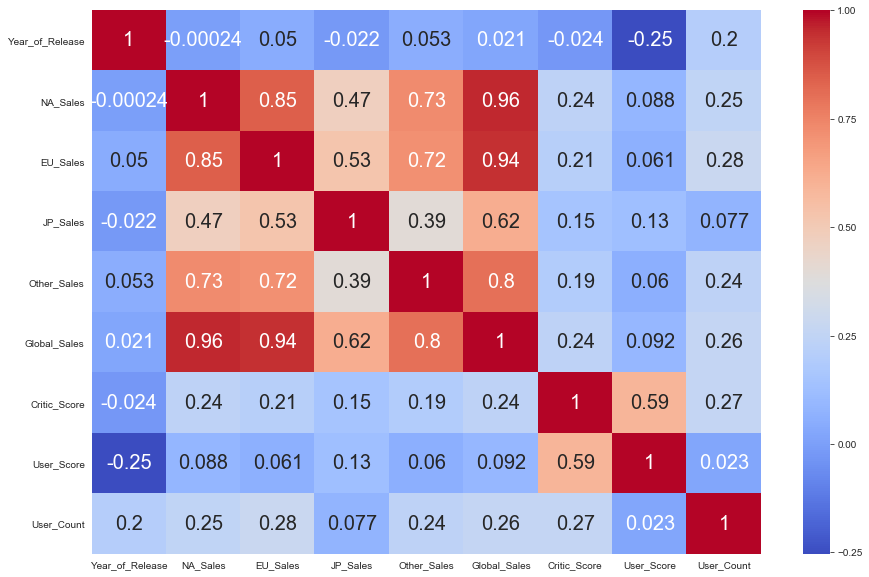

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='coolwarm')


## OLM

### OLM for Global_Sales~NA_Sales

In [71]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~NA_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 7.175e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:07   Log-Likelihood:                -97623.
No. Observations:                6644   AIC:                         1.952e+05
Df Residuals:                    6642   BIC:                         1.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8535.3923   7720.928      1.105      0.269   -6600.107    2.37e+04
NA_Sales       1.9459      0.007    267.870      0.000       1.932       1.960
==============================================================================
Omnibus:                     6540.893   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1229684.939
Skew:                           4.319   Prob(JB):                         0.00
Kurtosis:                      69.086   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for Global_Sales~EU_Sales

In [72]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 5.167e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:11   Log-Likelihood:                -98606.
No. Observations:                6644   AIC:                         1.972e+05
Df Residuals:                    6642   BIC:                         1.972e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.46e+05   8758.898     16.669      0.000    1.29e+05    1.63e+05
EU_Sales       2.7110      0.012    227.302      0.000       2.688       2.734
==============================================================================
Omnibus:                     7298.418   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6851978.048
Skew:                           4.702   Prob(JB):                         0.00
Kurtosis:                     160.044   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for NA_Sales~EU_Sales

In [73]:
abs(corr).sort_values(by = 'NA_Sales',  ascending= False)['NA_Sales']
data_reg_simple = ols(formula= "NA_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:14   Log-Likelihood:                -96884.
No. Observations:                6644   AIC:                         1.938e+05
Df Residuals:                    6642   BIC:                         1.938e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.166e+05   6758.872     17.247      0.000    1.03e+05     1.3e+05
EU_Sales       1.2010      0.009    130.490      0.000       1.183       1.219
==============================================================================
Omnibus:                     4073.255   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1189199.408
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      68.447   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for Critic_Score~User_Score

In [74]:
abs(corr).sort_values(by = 'Critic_Score',  ascending= False)['Critic_Score']
data_reg_simple = ols(formula= "Critic_Score~User_Score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3534.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:17   Log-Likelihood:                -25521.
No. Observations:                6644   AIC:                         5.105e+04
Df Residuals:                    6642   BIC:                         5.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8933      0.708     40.820      0.000      27.506      30.281
User_Score     0.5732      0.010     59.448      0.000       0.554       0.592
==============================================================================
Omnibus:                      119.955   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.560
Skew:                          -0.301   Prob(JB):                     2.70e-29
Kurtosis:                       3.335   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

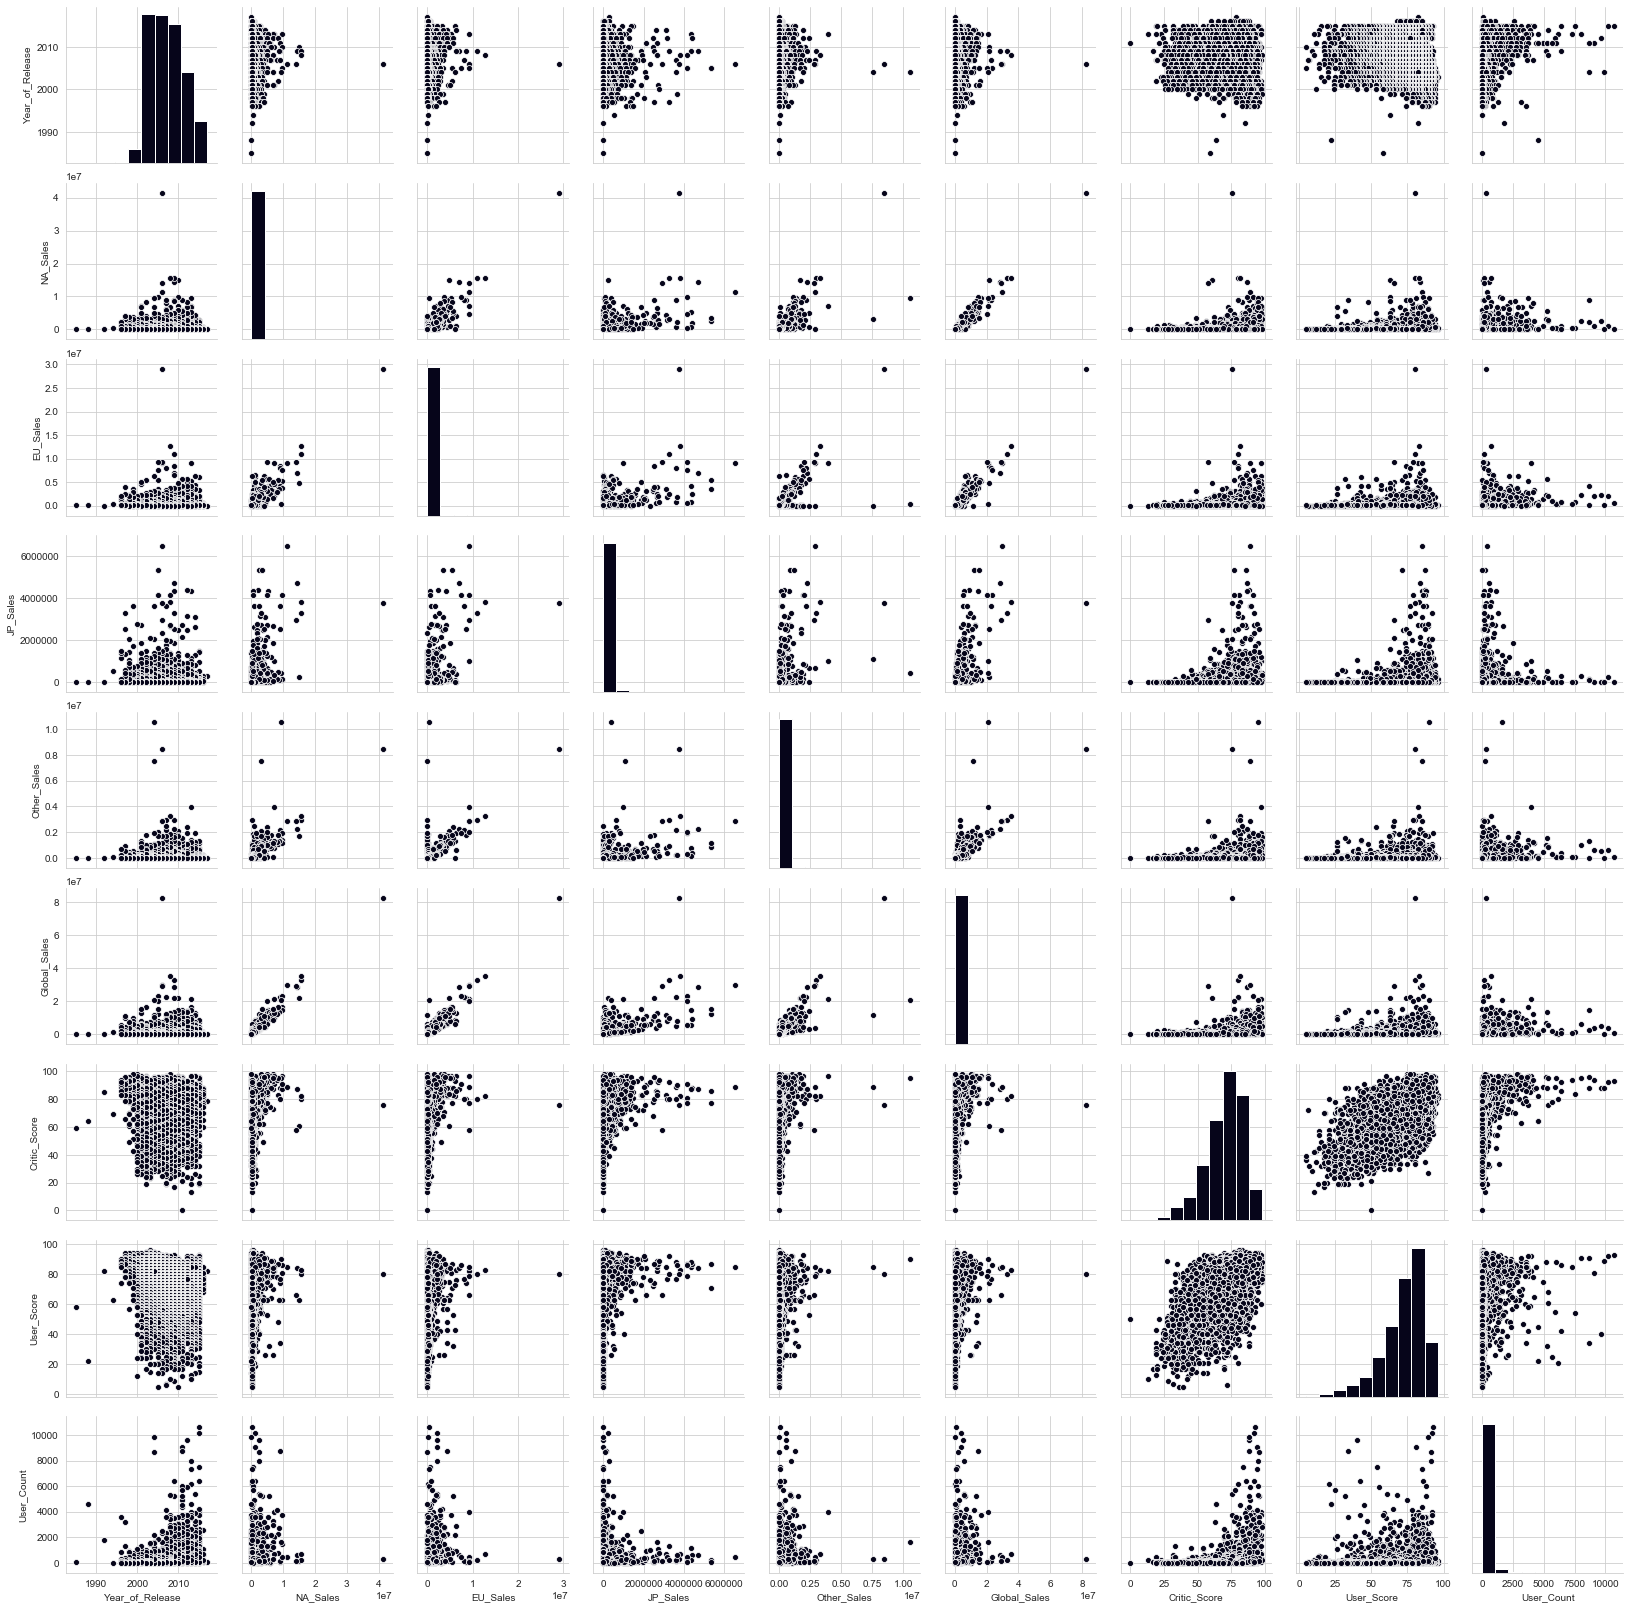

In [377]:
sns.pairplot(data_original, kind='scatter', dropna=True)

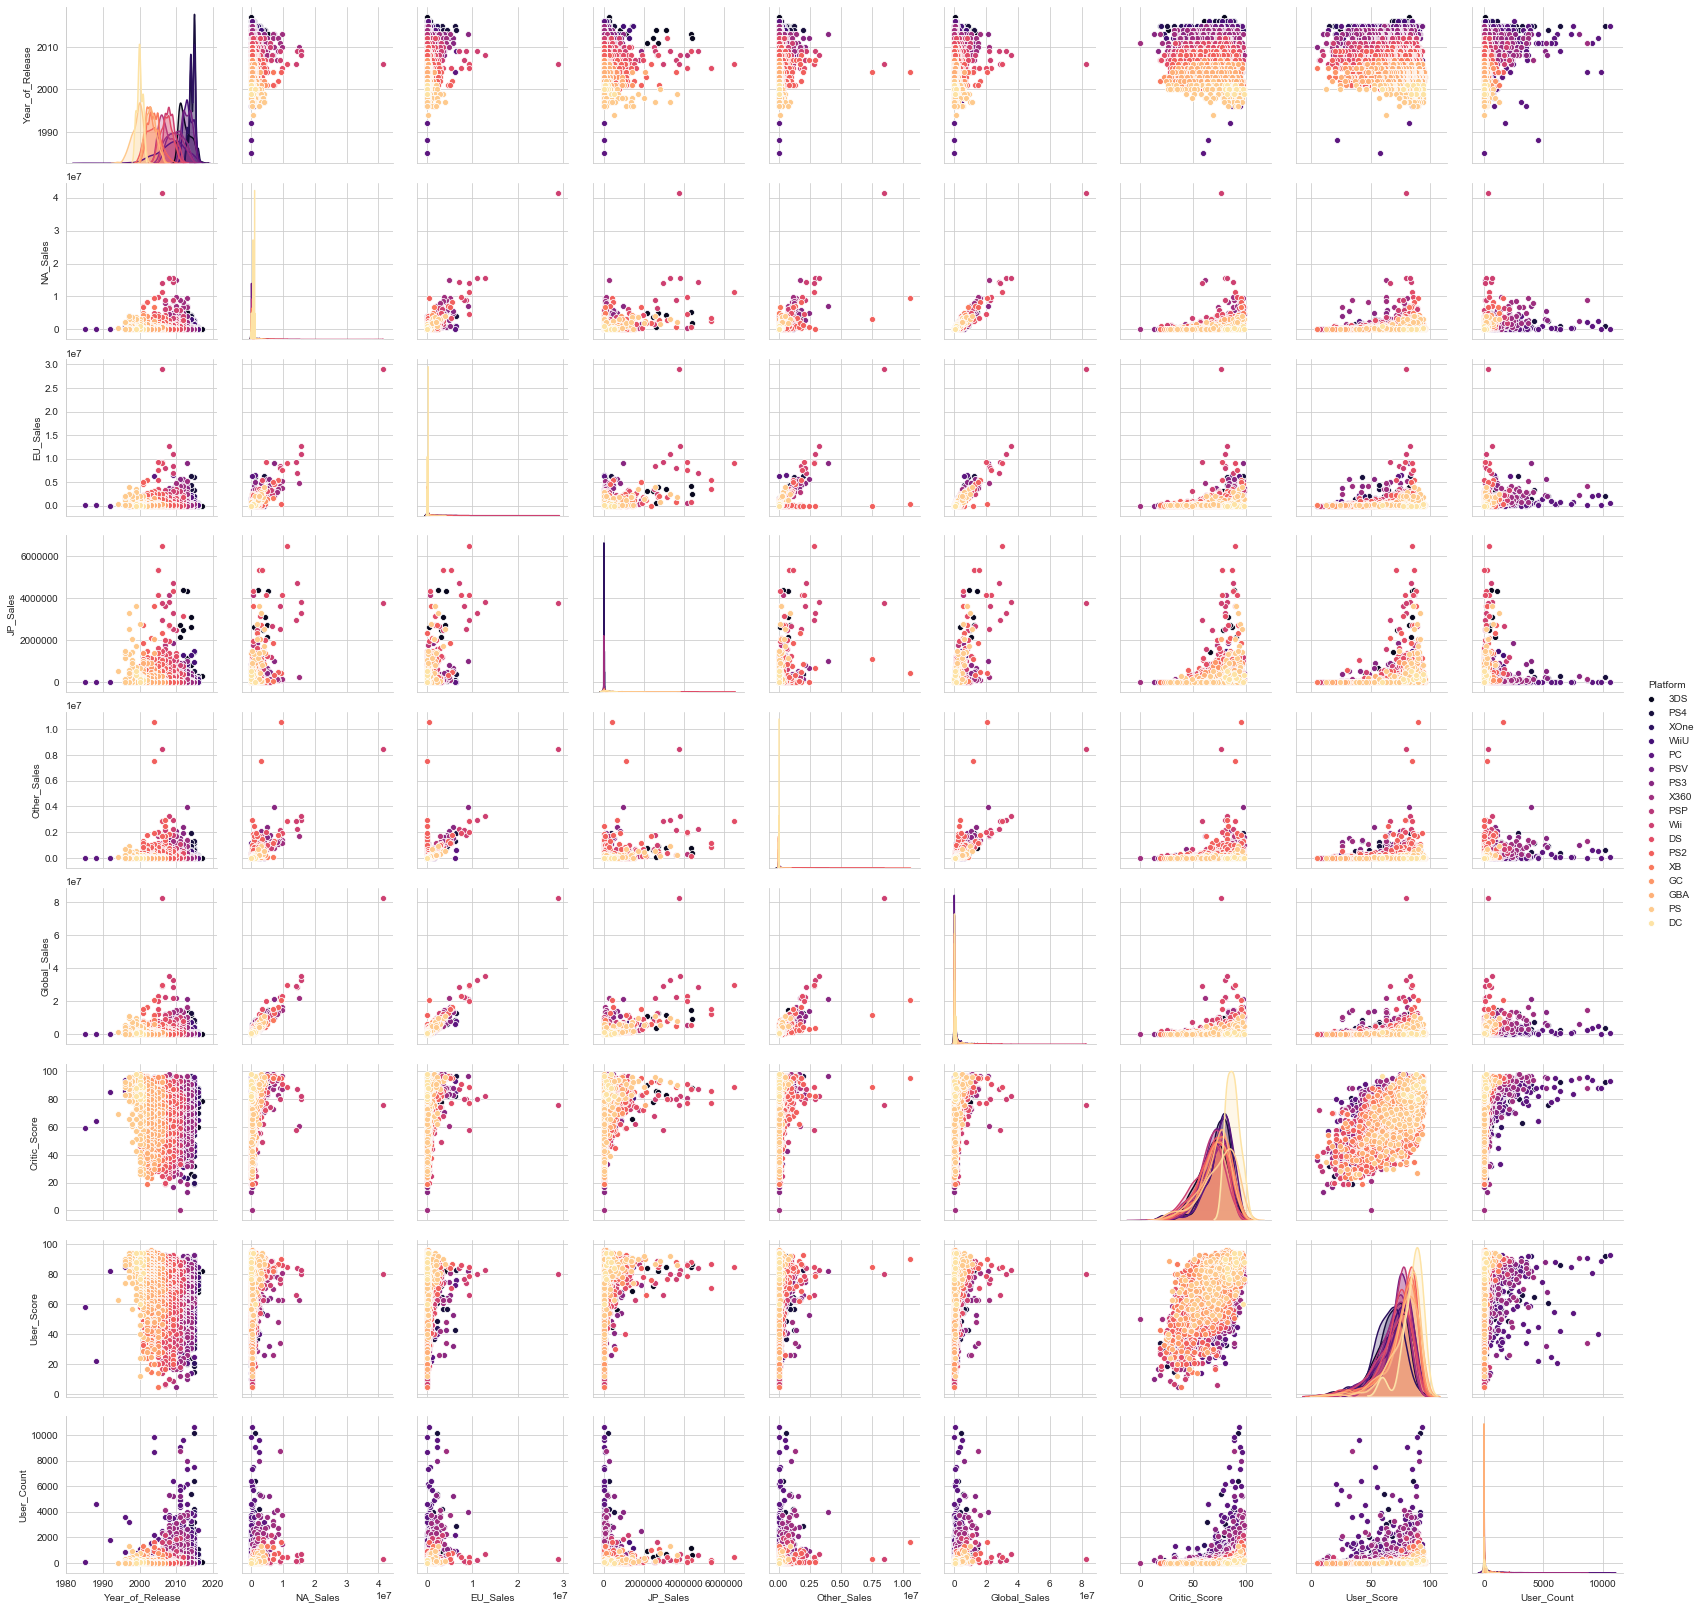

In [379]:
sns.pairplot(data_original, hue ='Platform', palette ='magma')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



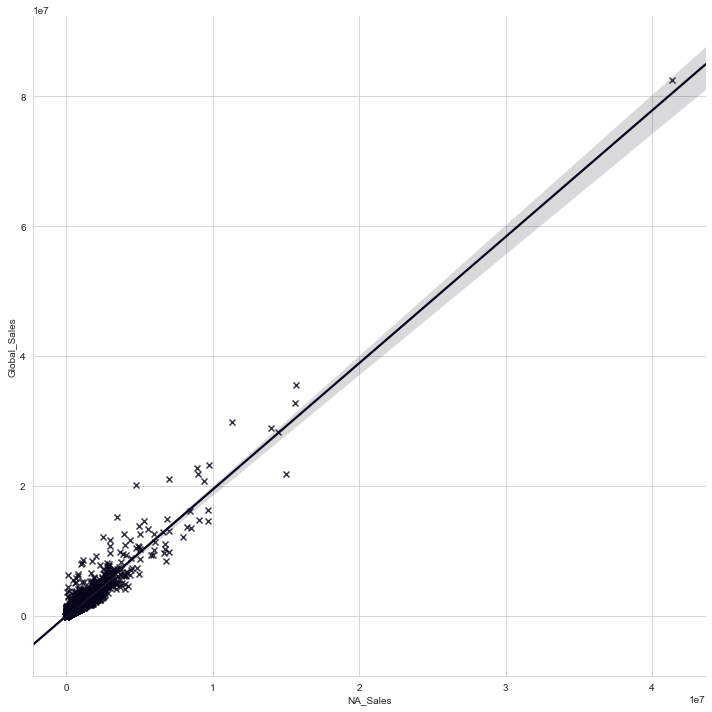

In [378]:

sns.lmplot(x='NA_Sales', y='Global_Sales', data= data_original, markers=[ "x"], fit_reg =True,size = 10)


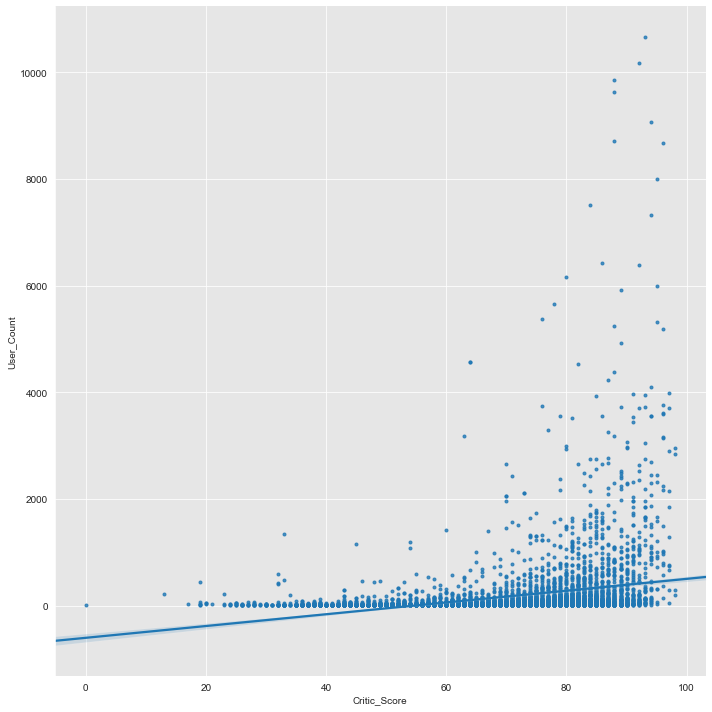

In [76]:
sns.lmplot(x='Critic_Score', y='User_Count', data= data_le, markers=["."], fit_reg =True,size = 10)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



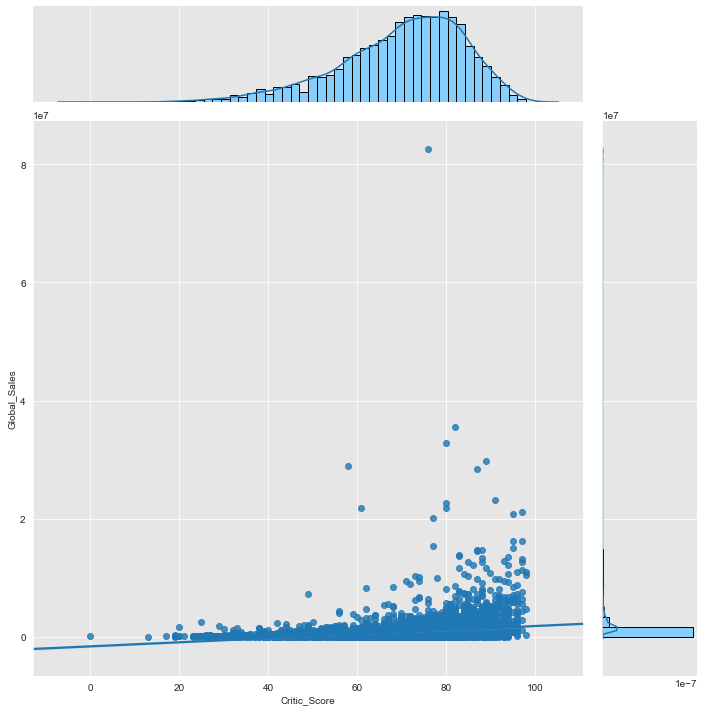

In [77]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

In [ ]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

Box plot of the relationship for type against rank and score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

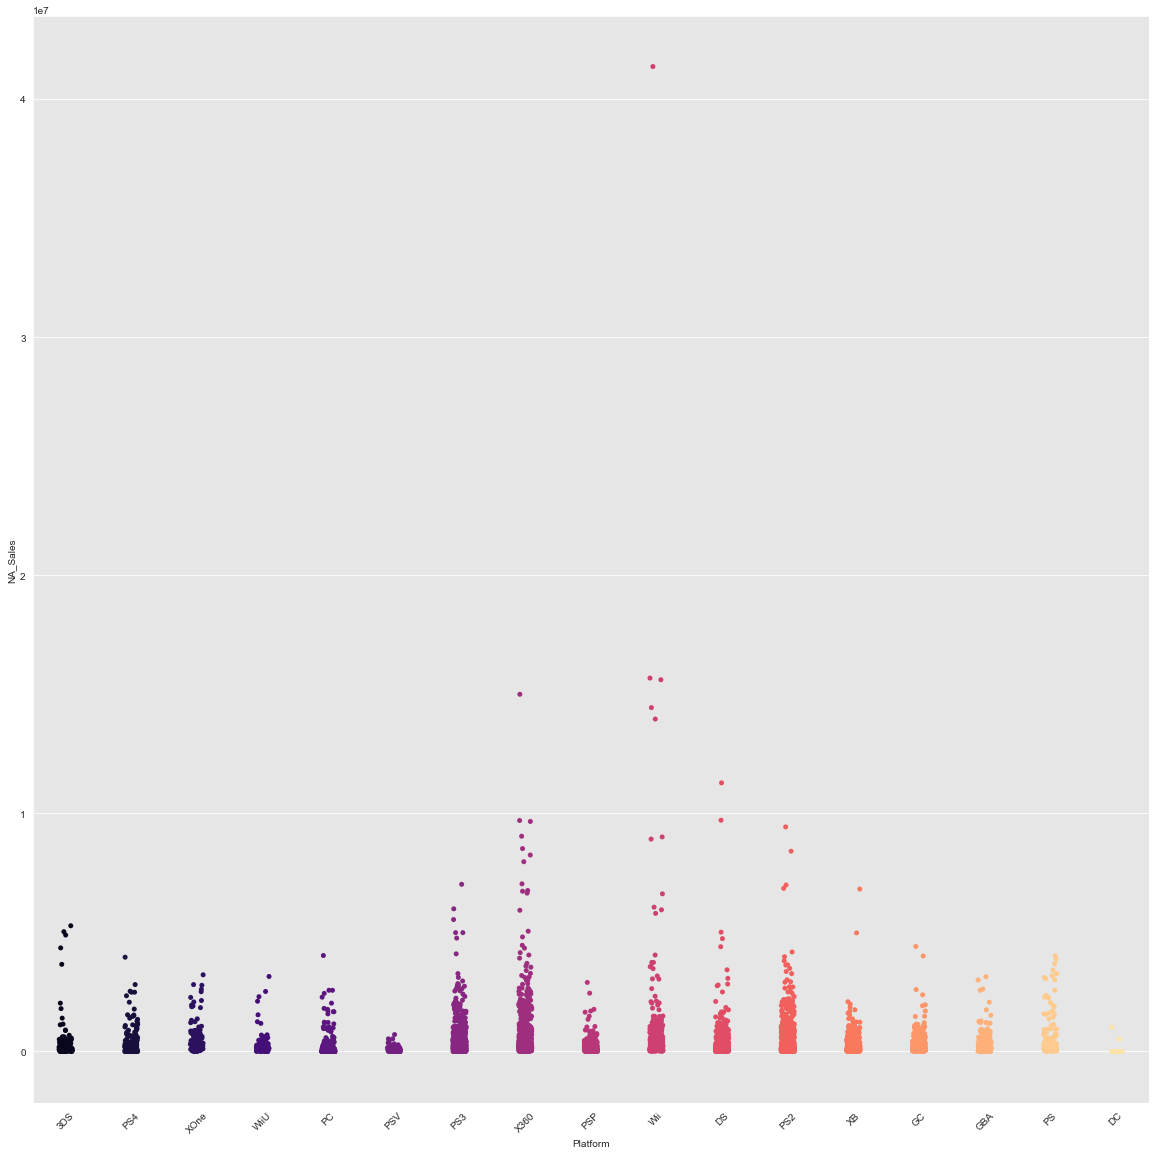

In [78]:
fig, ax = plt.subplots(figsize=(20,20))
sns.stripplot(data=data_le, x='Platform',y= 'NA_Sales' , orient='v', palette ='magma')
# plt.gca().invert_yaxis()
plt.ylim()
plt.xticks(rotation=45)

(-100, 16500000)

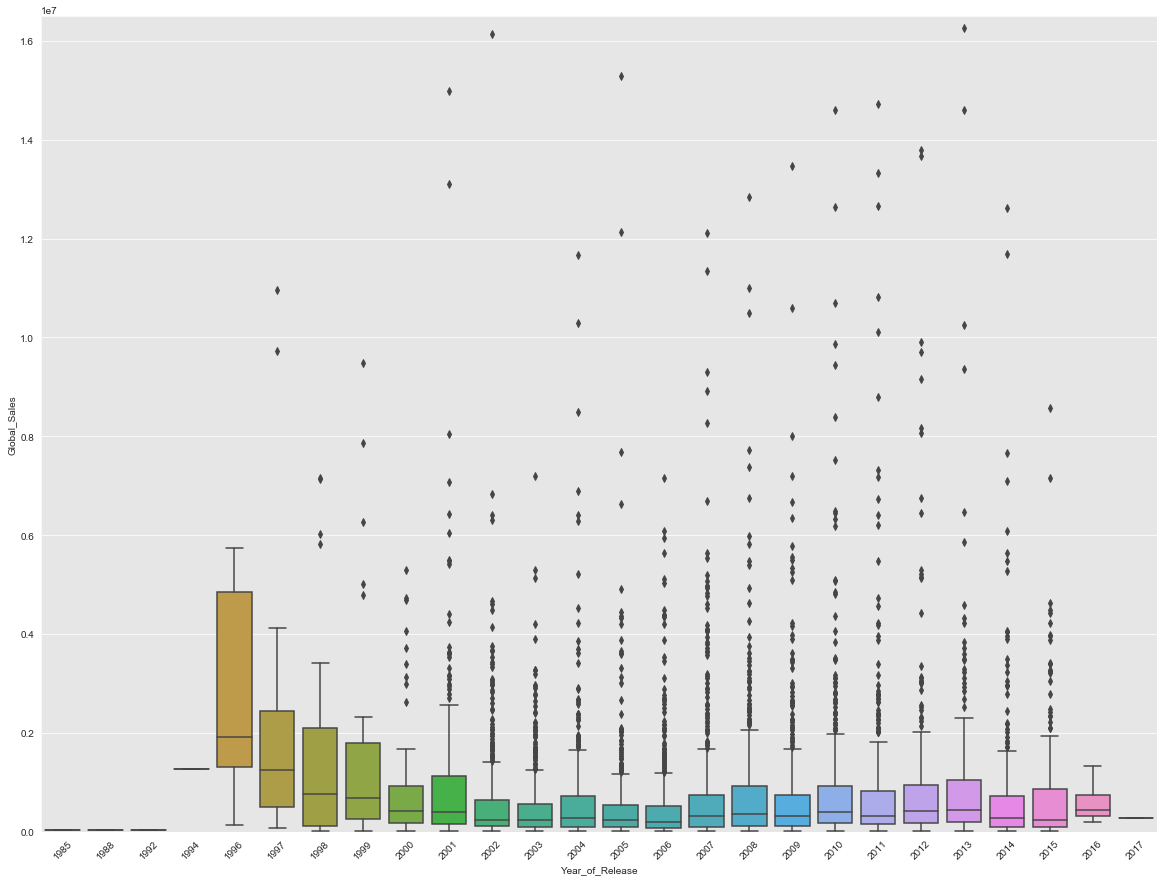

In [79]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data_le, x='Year_of_Release' ,y= 'Global_Sales', orient='v', )
plt.xticks(rotation=45)
# had to limit y axis the graph was very small (one outlier on 2006 @ 8.2 million not shown)
plt.ylim(-100,16500000) 

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

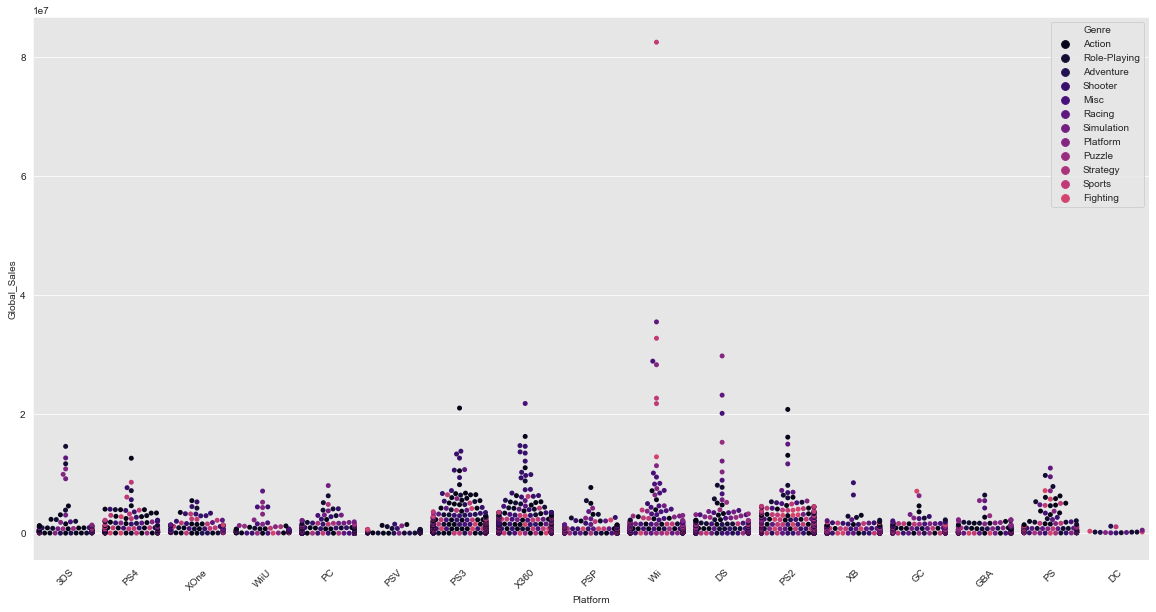

In [133]:
sns.set_palette("magma", 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Platform', y= 'Global_Sales', size=5, hue='Genre',cmap='ReW')
plt.xticks(rotation =45)


([<matplotlib.axis.XTick at 0x1c40b213c8>,
 <a list of 2 Text xticklabel objects>)

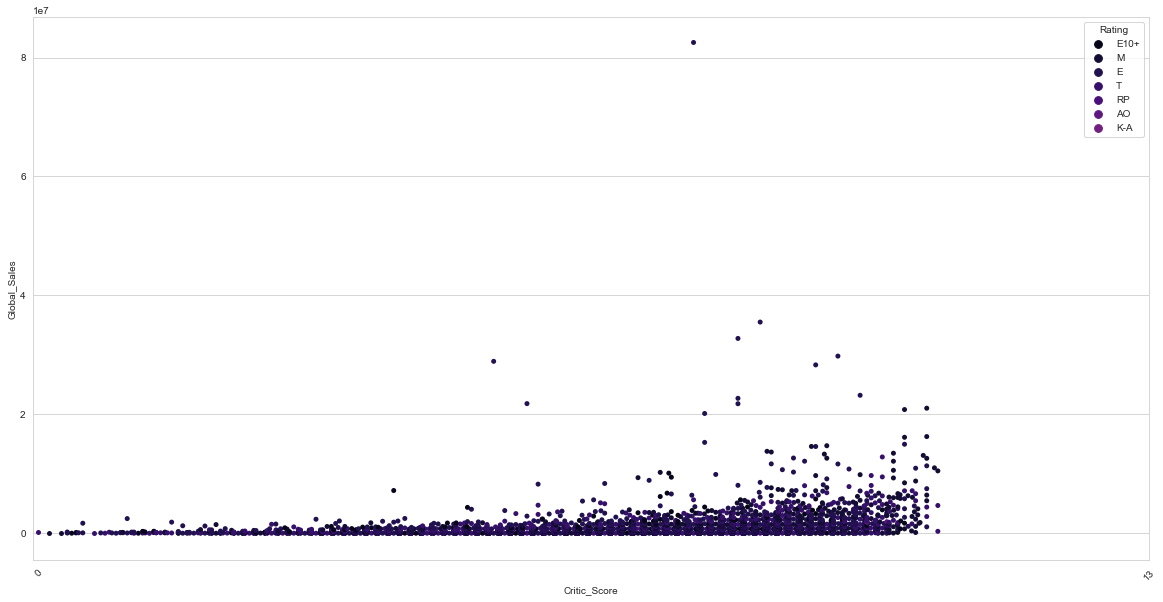

In [386]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Critic_Score', y= 'Global_Sales', size=5, hue='Rating', )
plt.xticks((0,100),rotation =45)


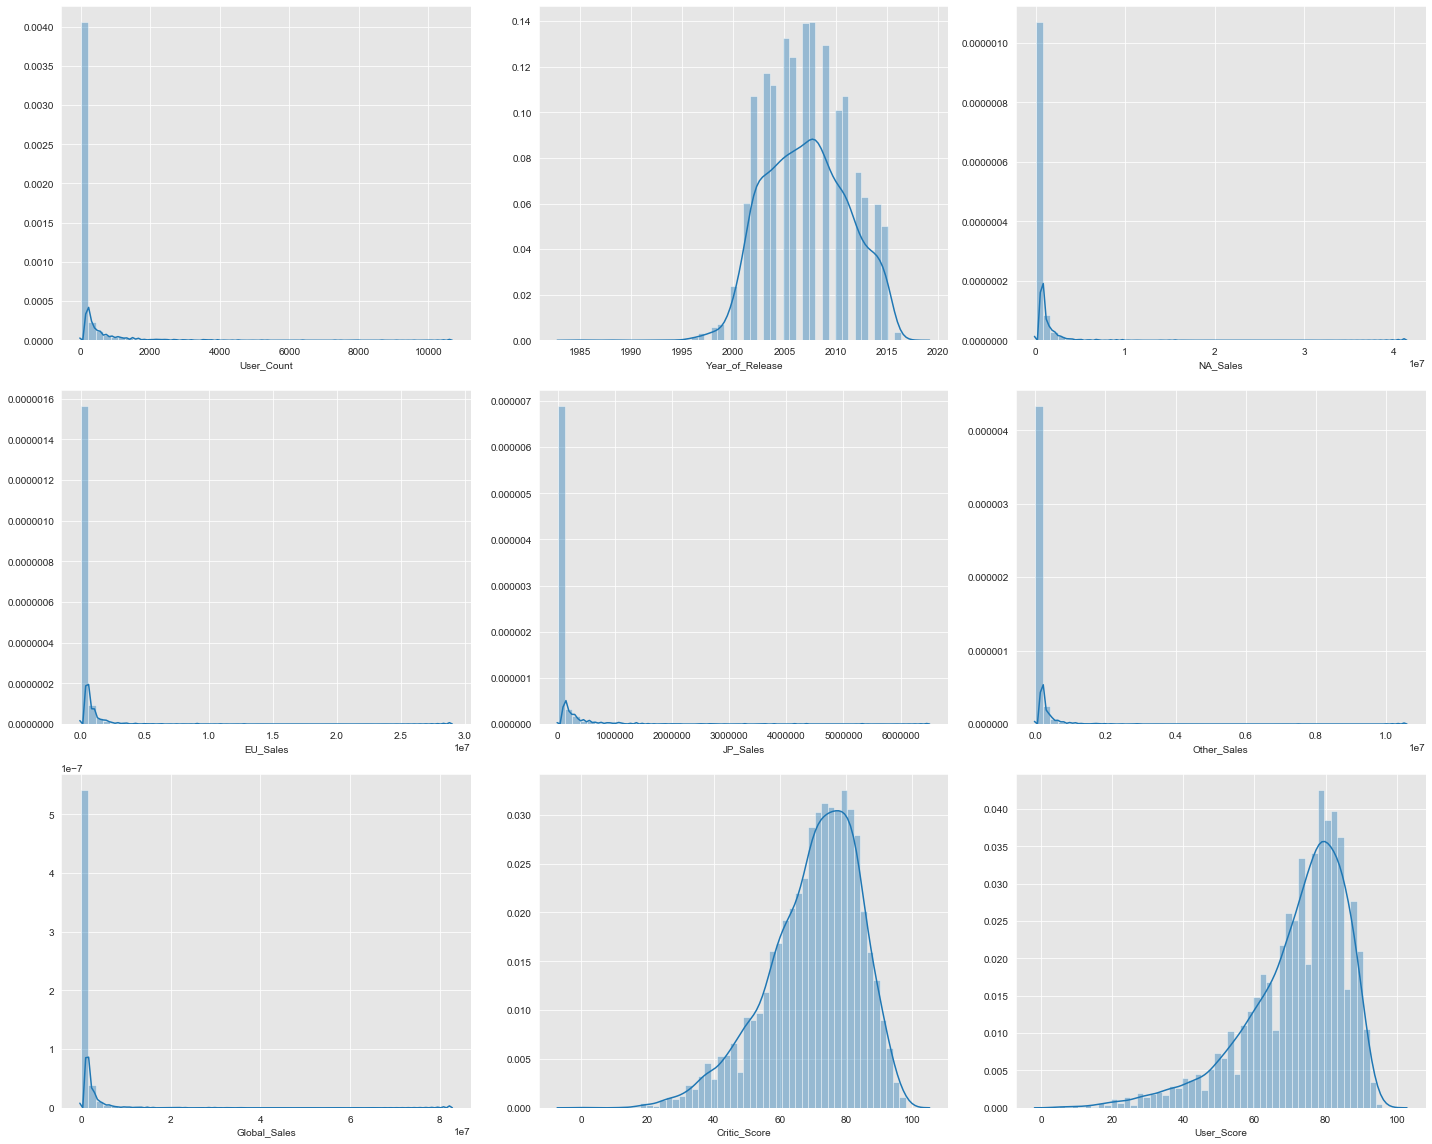

In [117]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_le_nums.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_le_nums[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Avg Sales against Consoles

In [412]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_le.groupby(['Platform']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend=dict(x=0.77, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor='light grey',
            xaxis=dict(title="Platform",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis=dict(title='Avg Sales',gridcolor="#DCDCDC"),
            title="Avg Sales from Different Markets and Consoles")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)


# Avg Sales against Genres

In [414]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend = dict(x=0.8, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor ='light grey',
            xaxis = dict(title="Genre",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis = dict(title='Avg Sales',gridcolor="#DCDCDC"),
            title ="Avg Sales from Different Markets and Genres")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)




# Modeling

## Global Sales Regression

In [415]:
data_le_dummy

Name  Year_of_Release   NA_Sales  \
0                  .hack//Infection Part 1             2002   490000.0   
1                   .hack//Mutation Part 2             2002   230000.0   
2                   .hack//Outbreak Part 3             2002   140000.0   
3                               007 Racing             2000   300000.0   
4                   007: Quantum of Solace             2008   290000.0   
8             007: The World is not Enough             2000   510000.0   
9                                1 vs. 100             2008    80000.0   
10                               1701 A.D.             2006        0.0   
11        18 Wheeler: American Pro Trucker             2002    90000.0   
13     18 Wheels of Steel: Extreme Trucker             2009        0.0   
14                        187: Ride or Die             2005    50000.0   
16                     2002 FIFA World Cup             2002    40000.0   
19        2010 FIFA World Cup South Africa             2010   300000.0   
23              2014 FIFA World Cup Brazil             2014   150000.0   
25                            24: The Game             2006   150000.0   
26                              25 to Life             2006   350000.0   
28                     300: March to Glory             2007   270000.0   
29                      3D Dot Game Heroes             2009   360000.0   
30                               4x4 EVO 2             2001   180000.0   
31              50 Cent: Blood on the Sand             2009   100000.0   
33                    50 Cent: Bulletproof             2005   330000.0   
35          7 Wonders of the Ancient World             2007   100000.0   
36                7th Dragon III Code: VFD             2015    40000.0   
37                      A Boy and His Blob             2009   180000.0   
38                         A Vampyre Story             2008        0.0   
39                          A Witch's Tale             2009    80000.0   
40        AC/DC LIVE: Rock Band Track Pack             2008   210000.0   
42                        AMF Bowling 2004             2003   220000.0   
43                      AMF Xtreme Bowling             2006    10000.0   
44                            APB Reloaded             2011    20000.0   
...                                    ...              ...        ...   
6603     Zero Escape: Virtue's Last Reward             2012    30000.0   
6604                         Zoids Assault             2007    80000.0   
6605                                ZombiU             2012   520000.0   
6606                    Zone of the Enders             2001   300000.0   
6607      Zone of the Enders HD Collection             2012   210000.0   
6609    Zone of the Enders: The 2nd Runner             2003   150000.0   
6610  Zone of the Enders: The Fist of Mars             2001    40000.0   
6611                            Zoo Keeper             2004   100000.0   
6612                          Zoo Tycoon 2             2004        0.0   
6613                       Zoo Tycoon 2 DS             2008   240000.0   
6614                         Zoo Tycoon DS             2005   860000.0   
6615                               ZooCube             2002    20000.0   
6616                                  Zubo             2008    80000.0   
6617                         Zumba Fitness             2010  1740000.0   
6618                    Zumba Fitness Core             2012        0.0   
6619                    Zumba Fitness Rush             2012        0.0   
6620            Zumba Fitness: World Party             2013   170000.0   
6621                         [Prototype 2]             2012   360000.0   
6624                           [Prototype]             2009   840000.0   
6626                               de Blob             2008   490000.0   
6627                             de Blob 2             2011    80000.0   
6631                            echochrome             2008        0.0   
6632           htoL#NiQ: The Firefly Diary

In [366]:
#selecting the columns in the data and labeling them 
year = data_le_dummy.iloc[:,1]
na_sales=data_le_dummy.iloc[:,2]
eu_sales=data_le_dummy.iloc[:,3]
global_sales=data_le_dummy.iloc[:,6]
critic_score=data_le_dummy.iloc[:,7]
user_score=data_le_dummy.iloc[:,8]
user_count=data_le_dummy.iloc[:,9]
rating=data_le_dummy.iloc[:,10:16]
platform=data_le_dummy.iloc[:,16:31]
genre=data_le_dummy.iloc[:,31:31]


#Assigning X and y values aswell as the train and test of X and y

X1 = data_le_dummy.drop(['Global_Sales','Name'], axis = 1)
y1 = data_le_dummy['Global_Sales']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)

print(f'{X1.shape},\n {y1.shape} ')

(4278, 286),
 (4278,) 


In [422]:
data_le_dummy.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count      4278.000000  4.278000e+03  4.278000e+03  4.278000e+03   
mean       2006.757597  3.968233e+05  2.288312e+05  9.312997e+04   
std           4.063605  1.111066e+06  7.700156e+05  3.665420e+05   
min        1985.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%        2004.000000  5.000000e+04  1.000000e+04  0.000000e+00   
50%        2007.000000  1.300000e+05  5.000000e+04  0.000000e+00   
75%        2010.000000  3.500000e+05  1.800000e+05  3.000000e+04   
max        2017.000000  4.136000e+07  2.896000e+07  6.500000e+06   

        Other_Sales  Global_Sales  Critic_Score   User_Score    User_Count  \
count  4.278000e+03  4.278000e+03   4278.000000  4278.000000   4278.000000   
mean   7.755493e+04  7.965147e+05     69.522908    72.768583    158.026882   
std    3.037158e+05  2.286723e+06     14.190933    14.408393    550.442942   
min    0.000000e+00  1.000000e+04      0.000000     5.000000      4.000000   
25%    1.000000e+04  1.000000e+05     61.000000    66.000000     10.000000   
50%    2.000000e+04  2.600000e+05     72.000000    76.000000     24.000000   
75%    6.000000e+04  7.000000e+05     80.000000    83.000000     77.000000   
max    1.057000e+07  8.253000e+07     98.000000    96.000000  10665.000000   

                 E         E10+            M           RP            T  \
count  4278.000000  4278.000000  4278.000000  4278.000000  4278.000000   
mean      0.322113     0.126695     0.185367     0.000234     0.365591   
std       0.467341     0.332670     0.388640     0.015289     0.481652   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               3DS           DC           DS           GC           PC  \
count  4278.000000  4278.000000  4278.000000  4278.000000  4278.000000   
mean      0.035063     0.003273     0.108929     0.081346     0.144460   
std       0.183961     0.057119     0.311587     0.273398     0.351597   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                PS          PS2          PS3          PS4          PSP  \
count  4278.000000  4278.000000  4278.000000  4278.000000  4278.000000   
mean      0.035063     0.266713     0.180224     0.036232     0.091164   
std       0.183961     0.442293     0.384419     0.186888     0.287876   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               PSV          Wii         WiiU         X360           XB  \
count  4278.000000  4278.000000  4278.000000  4278.000000  4278.000000   
mean      0.025245     0.111968     0.019402     0.200795     0.132305   
std       0.156888     0.315364     0.137948     0.400642     0.338861   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              XOne     

Preformed a Cross Validation on Linear Regression because it was the most accurate

In [367]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.9999917472181868
Linear Regression test accuracy is: 0.6072110550738918
Avg Cross Val Linear Regression is: -5475.4910996614135


In [398]:
y1_pred_lr.shape

(1284,)

In [368]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.9999917471915176
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9999950060010199
Ridge Regression @ alpha = 100 train accuracy is:  0.999991218459609
Ridge Regression @ alpha = 100 test accuracy is:  0.9999953883670043


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.87083e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=9.83499e-19): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.00629e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=9.764e-19): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.07269e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.11532e-18): result may not be accurate.

//anaconda3/lib/py

Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.9999826498265539


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.96129e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.99543e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=6.03746e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.9731e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.03514e-18): result may not be accurate.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.01609e-18): result may not be accurate.

//anaconda3/lib/p

Avg Cross Val Ridge Regression alpha @ 100 is:  0.9999835222073553


In [369]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.9999917472046005
Lasso Regression @ alpha 0.01 test accuracy is:  0.9999950019145144
Lasso Regression @ alpha 0.05 train accuracy is: 0.9999917469863154
Lasso Regression @ alpha 0.05 test accuracy is:  0.9999950088538379
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9999826361258183
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.9999826511054426


## Classification

In [421]:
# separate global sales by more than 5 million or less into 2 groups
data_le_dummy['Sold_Classification'] = []

for x in data_le_dummy['Global_Sales']:
    if x  >= 10000000:
        return 'Highly_Sold'
    elif x  <= 5000000:
        return 'Slightly_Sold'
    else:
        return 'Moderately_Sold'
     


ValueError: Length of values does not match length of index

In [429]:
data_le_dummy['Critic_Score']

0       75
1       76
2       70
3       51
4       54
8       61
9       38
10      79
11      52
13      56
14      51
16      78
19      82
23      73
25      62
26      39
28      55
29      77
30      59
31      72
33      50
35      60
36      77
37      80
38      75
39      50
40      60
42      48
43      30
44      56
        ..
6603    88
6604    46
6605    77
6606    78
6607    73
6609    82
6610    71
6611    74
6612    72
6613    60
6614    44
6615    67
6616    75
6617    42
6618    77
6619    73
6620    73
6621    79
6624    78
6626    82
6627    75
6631    79
6632    58
6633    85
6634    83
6635    80
6636    66
6638    79
6642    54
6643    84
Name: Critic_Score, Length: 4278, dtype: int64

In [449]:
# separated Critic Score into 3 groups  {1: score @ 50 or less, 2: score @ 51-74, 3: score @ 75 or more}

#Avg Critic_score is 72.768

data_le_dummy['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 50 else 2 for x in data_le_dummy['Critic_Score']]



In [445]:
data_le_dummy = data_le_dummy.drop(columns=['Critic_Score_Above_Avg','Critic_Score_Below_avg'])

In [446]:
data_le_dummy

Name  Year_of_Release   NA_Sales  \
0                  .hack//Infection Part 1             2002   490000.0   
1                   .hack//Mutation Part 2             2002   230000.0   
2                   .hack//Outbreak Part 3             2002   140000.0   
3                               007 Racing             2000   300000.0   
4                   007: Quantum of Solace             2008   290000.0   
8             007: The World is not Enough             2000   510000.0   
9                                1 vs. 100             2008    80000.0   
10                               1701 A.D.             2006        0.0   
11        18 Wheeler: American Pro Trucker             2002    90000.0   
13     18 Wheels of Steel: Extreme Trucker             2009        0.0   
14                        187: Ride or Die             2005    50000.0   
16                     2002 FIFA World Cup             2002    40000.0   
19        2010 FIFA World Cup South Africa             2010   300000.0   
23              2014 FIFA World Cup Brazil             2014   150000.0   
25                            24: The Game             2006   150000.0   
26                              25 to Life             2006   350000.0   
28                     300: March to Glory             2007   270000.0   
29                      3D Dot Game Heroes             2009   360000.0   
30                               4x4 EVO 2             2001   180000.0   
31              50 Cent: Blood on the Sand             2009   100000.0   
33                    50 Cent: Bulletproof             2005   330000.0   
35          7 Wonders of the Ancient World             2007   100000.0   
36                7th Dragon III Code: VFD             2015    40000.0   
37                      A Boy and His Blob             2009   180000.0   
38                         A Vampyre Story             2008        0.0   
39                          A Witch's Tale             2009    80000.0   
40        AC/DC LIVE: Rock Band Track Pack             2008   210000.0   
42                        AMF Bowling 2004             2003   220000.0   
43                      AMF Xtreme Bowling             2006    10000.0   
44                            APB Reloaded             2011    20000.0   
...                                    ...              ...        ...   
6603     Zero Escape: Virtue's Last Reward             2012    30000.0   
6604                         Zoids Assault             2007    80000.0   
6605                                ZombiU             2012   520000.0   
6606                    Zone of the Enders             2001   300000.0   
6607      Zone of the Enders HD Collection             2012   210000.0   
6609    Zone of the Enders: The 2nd Runner             2003   150000.0   
6610  Zone of the Enders: The Fist of Mars             2001    40000.0   
6611                            Zoo Keeper             2004   100000.0   
6612                          Zoo Tycoon 2             2004        0.0   
6613                       Zoo Tycoon 2 DS             2008   240000.0   
6614                         Zoo Tycoon DS             2005   860000.0   
6615                               ZooCube             2002    20000.0   
6616                                  Zubo             2008    80000.0   
6617                         Zumba Fitness             2010  1740000.0   
6618                    Zumba Fitness Core             2012        0.0   
6619                    Zumba Fitness Rush             2012        0.0   
6620            Zumba Fitness: World Party             2013   170000.0   
6621                         [Prototype 2]             2012   360000.0   
6624                           [Prototype]             2009   840000.0   
6626                               de Blob             2008   490000.0   
6627                             de Blob 2             2011    80000.0   
6631                            echochrome             2008        0.0   
6632           htoL#NiQ: The Firefly Diary

In [447]:
data_le_dummy.head(3)

Name  Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
0  .hack//Infection Part 1             2002  490000.0  380000.0  260000.0   
1   .hack//Mutation Part 2             2002  230000.0  180000.0  200000.0   
2   .hack//Outbreak Part 3             2002  140000.0  110000.0  170000.0   

   Other_Sales  Global_Sales  Critic_Score  User_Score  User_Count  E  E10+  \
0     130000.0     1270000.0            75        85.0        60.0  0     0   
1      60000.0      680000.0            76        89.0        81.0  0     0   
2      40000.0      460000.0            70        87.0        19.0  0     0   

   M  RP  T  3DS  DC  DS  GC  PC  PS  PS2  PS3  PS4  PSP  PSV  Wii  WiiU  \
0  0   0  1    0   0   0   0   0   0    1    0    0    0    0    0     0   
1  0   0  1    0   0   0   0   0   0    1    0    0    0    0    0     0   
2  0   0  1    0   0   0   0   0   0    1    0    0    0    0    0     0   

   X360  XB  XOne  Action  Adventure  Fighting  Misc  Racing  Role-Playing  \
0     0   0     0       0          0         0     0       0             1   
1     0   0     0       0          0         0     0       0             1   
2     0   0     0       0          0         0     0       0             1   

   Shooter  Simulation  Sports  Strategy   Inc  10TACLE Studios  1C Company  \
0        0           0       0         0     0                0           0   
1        0           0       0         0     0                0           0   
2        0           0       0         0     0                0           0   

   2D Boy  3DO  505 Games  AQ Interactive  ASCII Entertainment  \
0       0    0          0               0                    0   
1       0    0          0               0                    0   
2       0    0          0               0                    0   

   Acclaim Entertainment  Ackkstudios  Acquire  Activision  \
0                      0            0        0           0   
1                      0            0        0           0   
2                      0            0        0           0   

   Activision Blizzard  Activision Value  Agatsuma Entertainment  Agetec  \
0                    0                 0                       0       0   
1                    0                 0                       0       0   
2                    0                 0                       0       0   

   Aksys Games  Aqua Plus  Arc System Works  Ascaron Entertainment GmbH  \
0            0          0                 0                           0   
1            0          0                 0                           0   
2            0          0                 0                           0   

   Aspyr  Atari  Atlus  Avalon Interactive  BAM! Entertainment  Banpresto  \
0      0      1      0                   0                   0          0   
1      0      1      0                   0                   0          0   
2      0      1      0                   0                   0          0   

   Bethesda Softworks  Bigben Interactive  Black Bean Games  \
0                   0                   0                 0   
1                   0                   0                 0   
2                   0                   0                 0   

   Black Label Games  Blue Byte  Bohemia Interactive  Brash Entertainment  \
0                  0          0                    0                    0   
1                  0          0                    0                    0   
2                  0          0                    0                    0   

   CCP  CDV Software Entertainment  Capcom  Cave  City Interactive  \
0    0                           0       0     0                 0   
1    0                           0       0     0                 0   
2    0                           0       0     0                 0   

   Cloud Imperium Games Corporation  Codemasters  Codemasters Online  \
0                                 0            0                   0   
1                                 0          

In [380]:
X2 = data_le_dummy.drop(['Global_Sales','Name'], axis = 1)
y2 = data_le_dummy['Global_Sales']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=3)

print(f'{X2.shape},\n {y2.shape} ')

(4278, 286),
 (4278,) 


In [424]:
dictionary = dict(zip(list(X2_train.columns), list(lr.coef_[0])))

TypeError: 'numpy.float64' object is not iterable

In [400]:
#LogisticRegression
logreg= LogisticRegression(C=1,fit_intercept=True)
logreg.fit(X1_train,y1_train)
y1_pred_logreg = logreg.predict(X1_test)

logreg_accuracy_train = logreg.score(X1_train ,y1_train)

logreg_accuracy_test = logreg.score(X1_test,y1_test)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train} and Logistic Regression test accuracy is {logreg_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: Unknown label type: 'continuous'

In [382]:

k_range= range(1,500)
scores= []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y1_pred_knn = knn.predict(X1_test)
    scores.append(metrics.accuracy_score(y1_test,y1_pred_knn))
plt.plot(k_range,scores)


ValueError: Unknown label type: 'continuous'

In [ ]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 175 
knn175 = neighbors.KNeighborsClassifier(n_neighbors=175)
knn175.fit(X1_test, y1_test)
y1_pred_knn175 = knn175.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn175_accuracy_train = knn175.score(X1_train,y1_train)
knn175_accuracy_test = knn175.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 175 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 175 Regression test accuracy is {knn5_accuracy_test}')


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)
y1_pred_rf_1 = rf.predict(X1_test)

rf_accuracy_train_1 = rf.score(X1_train,y1_train)
rf_accuracy_test_1 = rf.score(X1_test,y1_test)

predict_acc = metrics.accuracy_score(y1_test,y1_pred_rf_1)
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_1}\nRandom Forest Classifier test accuracy is {rf_accuracy_test_1}\n'
        f'Random Forest Classifier predict accuracy is {predict_acc}')


In [409]:
# SVC
svc = svm.SVC(kernel='linear')
svc.fit(X1_train,y1_train)
svc.score(X1_test,y1_test)
y1_pred_svc_1 = svc.predict(X1_test)

svc_accuracy_train_1 = svc.score(X1_train,y1_train)
svc_accuracy_test_1 = svc.score(X1_test,y1_test)

predict_acc = metrics.accuracy_score(y1_test,y1_pred_svc_1)
print(f'Random Forest Classifier train accuracy is {svc_accuracy_train_1}\nRandom Forest Classifier test accuracy is {svc_accuracy_test_1}\n'
        f'Random Forest Classifier predict accuracy is {predict_acc}')


ValueError: Unknown label type: 'continuous'

Not needed but this is used to find the optimal k nearest neighbor from the range specified


# Ploting the Predicted Values for each model

Original Dataset


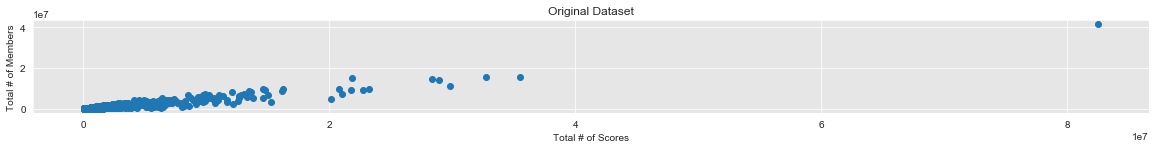

Predicted Model for Linear Regression


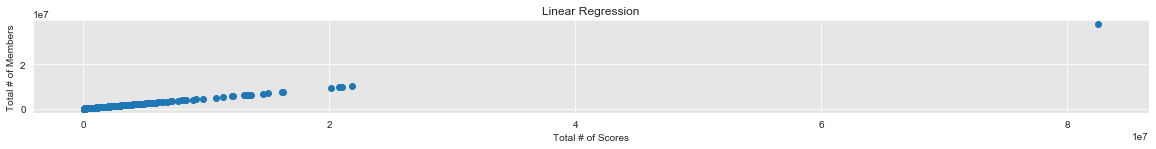

Predicted Cross Validation Model for Linear Regression


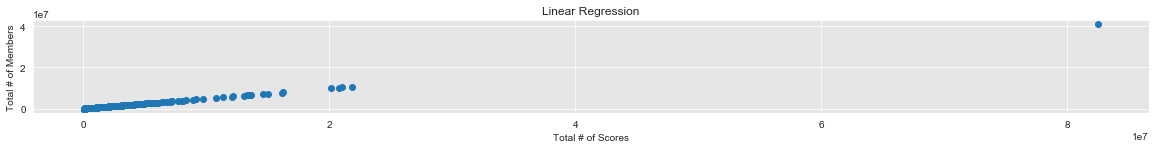

Predicted Model for Logistic Regression


NameError: name 'y1_pred_logreg' is not defined

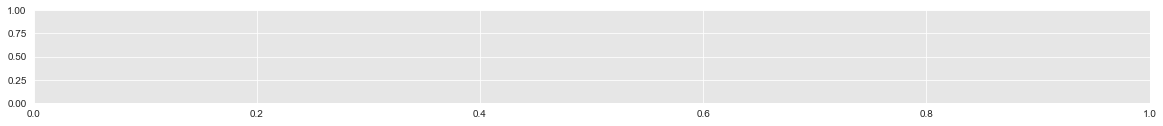

In [348]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Logistic Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_logreg)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Logistic Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(817)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# ploting Random Forest Classifier =1 Model
print('Predicted Model for Random Forest Classifier @ N Estimators 100')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(818)
plt.scatter(X1_test,y1_pred_rf_1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Random Forest Classifier')
plt.show()


# Platform against Global Sales

In [71]:
#Assigning X and y values aswell as the train and test of X and y
X2 = global_sales.values.reshape(-1,1)
y2 = platform.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=3)


In [72]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


ValueError: could not convert string to float: 'PSP'

In [44]:
X2_test.shape

(1112, 1)

In [45]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=100)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586810573
Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586959989


In [46]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.7158371469364215
Lasso Regression @ alpha 0.01 test accuracy is: 0.6960977919435276
Lasso Regression @ alpha 0.00001 train accuracy is: 0.7158371469432537
Lasso Regression @ alpha 0.00001 test accuracy is: 0.696097758714325
